In [1]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.11 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.11.4"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.11"):
    print(FAIL, "Python version 3.11 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.24.4", 'matplotlib': "3.7.2",'sklearn': "1.3.0", 
                'pandas': "2.0.3",'xgboost': "1.7.6", 'shap': "0.42.1", 'seaborn': "0.12.2"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.11.4

[ OK ] numpy version 1.24.4 is installed.
[ OK ] matplotlib version 3.7.2 is installed.
[ OK ] sklearn version 1.3.0 is installed.
[ OK ] pandas version 2.0.3 is installed.
[ OK ] xgboost version 1.7.6 is installed.
[ OK ] shap version 0.42.1 is installed.
[ OK ] seaborn version 0.12.2 is installed.


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [39]:
# load packages
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
import seaborn as sns

# import data
df = pd.read_csv('/Users/yingyizhu/Desktop/DATA1030/DATA1030-Fall2023/Midterm Project/london_merged.csv')
df.describe().T
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [40]:
# print data types
print(df.dtypes)
df.info()

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


cnt
46      46
53      39
33      36
70      36
120     36
        ..
3022     1
3112     1
1338     1
3270     1
2220     1
Name: count, Length: 3781, dtype: int64
count    17414.000000
mean      1143.101642
std       1085.108068
min          0.000000
25%        257.000000
50%        844.000000
75%       1671.750000
max       7860.000000
Name: cnt, dtype: float64


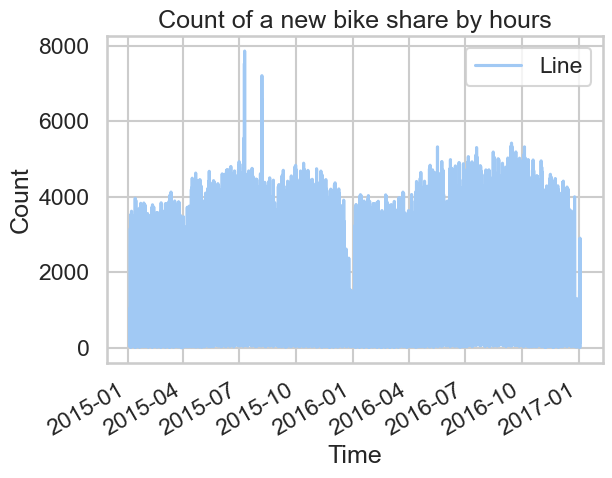

In [41]:
# count
print(df['cnt'].value_counts())
print(df['cnt'].describe())

# Convert 'timestamp' column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Create a line plot using 'timestamp' as x-axis and 'cnt' as y-axis
df.plot(x='timestamp', y='cnt', kind='line')

plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Count of a new bike share by hours')
plt.legend(['Line'])

plt.show()

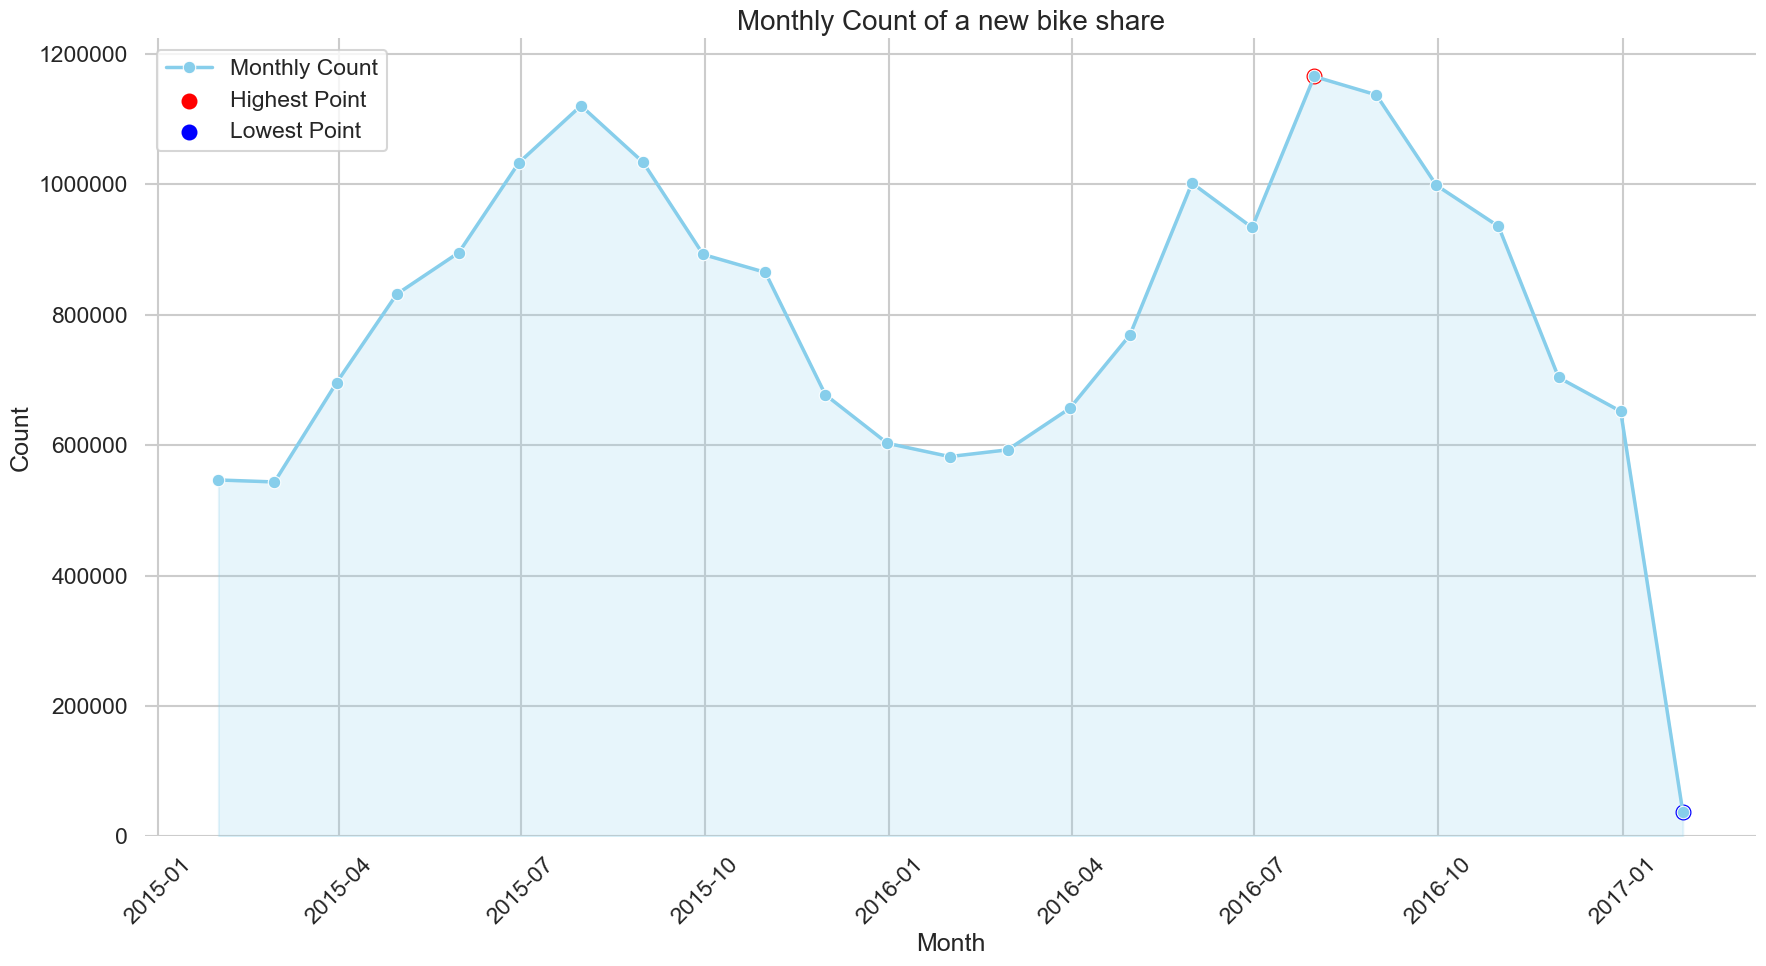

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

df['timestamp'] = pd.to_datetime(df['timestamp'])
monthly_count = df.resample('M', on='timestamp').sum()['cnt']
data_plot = monthly_count.reset_index(name='cnt')

sns.set_style("whitegrid")
sns.set_context("talk")

# Choose a color palette
palette = sns.color_palette("coolwarm", n_colors=len(data_plot))
plt.figure(figsize=(18, 10))
sns.lineplot(x='timestamp', y='cnt', data=data_plot, marker='o', linestyle='-', color="skyblue", linewidth=2.5, label='Monthly Count')
plt.fill_between(data_plot['timestamp'], data_plot['cnt'], color="skyblue", alpha=0.2)
max_idx = data_plot['cnt'].idxmax()
min_idx = data_plot['cnt'].idxmin()
plt.scatter(data_plot['timestamp'][max_idx], data_plot['cnt'][max_idx], color='red', s=100, label='Highest Point')
plt.scatter(data_plot['timestamp'][min_idx], data_plot['cnt'][min_idx], color='blue', s=100, label='Lowest Point')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Count of a new bike share', fontsize=20)
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: int(x)))
plt.ylim(bottom=0)
plt.xticks(rotation=45)
plt.legend(loc='upper left')
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.savefig("Monthly Count of a new bike share", dpi = 300)
plt.show()

In [43]:
# no duplicated rows
df.duplicated().sum()

0

In [44]:
# season

df['season'].replace(0, 'Spring', inplace=True)
df['season'].replace(1, 'Summer', inplace=True)
df['season'].replace(2, 'Fall', inplace=True)
df['season'].replace(3, 'Winter', inplace=True)

In [45]:
#Is Holiday

df['is_holiday'].replace(1, 'Yes', inplace=True)
df['is_holiday'].replace(0, 'No', inplace=True)

In [46]:
# Is weekend

df['is_weekend'].replace(1, 'Yes', inplace=True)
df['is_weekend'].replace(0, 'No', inplace=True)

In [47]:
#Weather Codes

df['weather_code'].replace(1, 'Clear', inplace=True)
df['weather_code'].replace(2, 'Scattered clouds', inplace=True)
df['weather_code'].replace(3, 'Broken clouds', inplace=True)
df['weather_code'].replace(4, 'Cloudy', inplace=True)
df['weather_code'].replace(7, 'Rain/Light Rain', inplace=True)
df['weather_code'].replace(10, 'Rain with thunderstorm', inplace=True)
df['weather_code'].replace(26, 'snowfall', inplace=True)

In [48]:
# check the dataset again
df.head(10)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken clouds,No,Yes,Winter
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,No,Yes,Winter
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Clear,No,Yes,Winter
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Clear,No,Yes,Winter
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,Clear,No,Yes,Winter
5,2015-01-04 05:00:00,46,2.0,2.0,93.0,4.0,Clear,No,Yes,Winter
6,2015-01-04 06:00:00,51,1.0,-1.0,100.0,7.0,Cloudy,No,Yes,Winter
7,2015-01-04 07:00:00,75,1.0,-1.0,100.0,7.0,Cloudy,No,Yes,Winter
8,2015-01-04 08:00:00,131,1.5,-1.0,96.5,8.0,Cloudy,No,Yes,Winter
9,2015-01-04 09:00:00,301,2.0,-0.5,100.0,9.0,Broken clouds,No,Yes,Winter


In [49]:
df['timestamp'].head()
print(df['weather_code'].value_counts())

weather_code
Clear                     6150
Scattered clouds          4034
Broken clouds             3551
Rain/Light Rain           2141
Cloudy                    1464
snowfall                    60
Rain with thunderstorm      14
Name: count, dtype: int64


In [50]:
sns.set_style("whitegrid")
sns.set_palette("pastel")

fig, ax = plt.subplots(figsize=(15, 10))

sns.boxplot(x='weather_code', y='cnt', data=df, ax=ax)
plt.xticks(rotation=45)

ax.set_yscale('log')

ax.set_xlabel('Weather', fontsize=16)
ax.set_ylabel('Log(Count of a new bike share)', fontsize=16)
ax.set_title('Count of a new bike share grouped by weather (Log Scale)', fontsize=20, pad=20)
plt.savefig('bike_share_weather_boxplot.png', dpi=300, bbox_inches='tight')

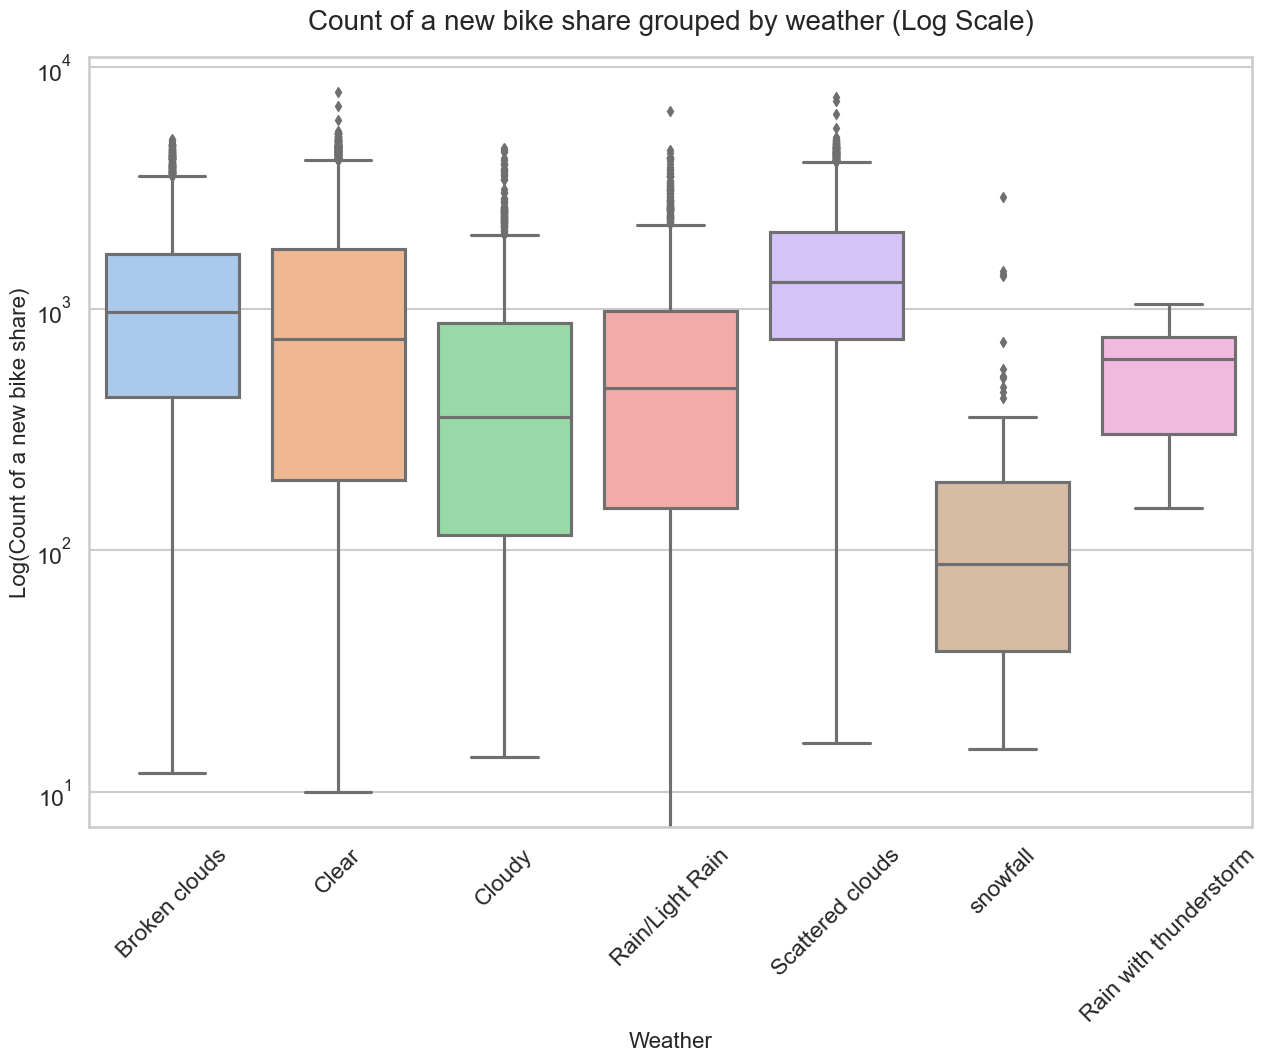

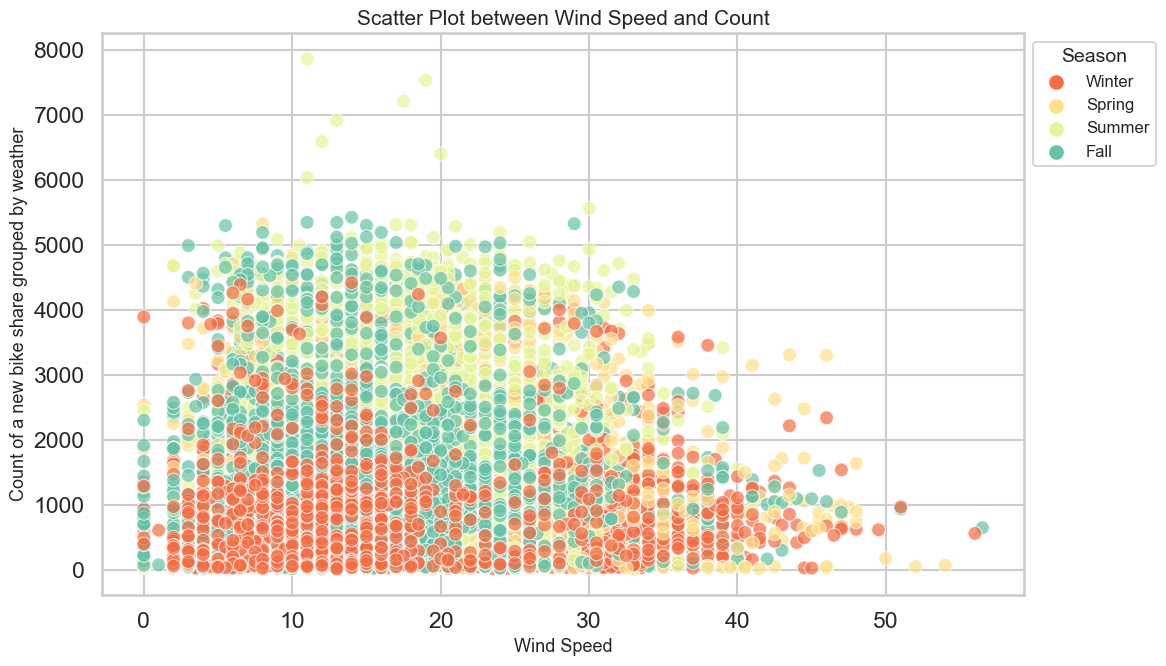

In [51]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x='wind_speed', y='cnt', hue='season', data=df, palette='Spectral', s=100, edgecolor='w', alpha=0.7)

plt.xlabel('Wind Speed', fontsize=13)
plt.ylabel('Count of a new bike share grouped by weather', fontsize=13)
plt.title('Scatter Plot between Wind Speed and Count', fontsize=15)
plt.legend(title='Season', title_fontsize='14', fontsize=12, loc='upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.savefig("Scatter Plot between Wind Speed and Count", dpi = 300)
plt.show()

<Figure size 400x400 with 0 Axes>

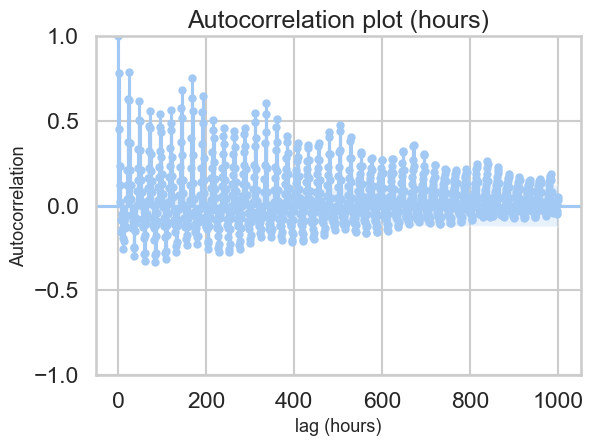

In [52]:
import statsmodels.api as sm

plt.figure(figsize=(4,4))

sm.graphics.tsa.plot_acf(df['cnt'], lags=1000)
plt.title("Autocorrelation plot (hours)")
plt.xlabel('lag (hours)', fontsize=13)
plt.ylabel('Autocorrelation', fontsize=13)
plt.tight_layout()
plt.savefig("autocorrelation.png", dpi = 300)
plt.show()

In [53]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, TimeSeriesSplit
from sklearn.metrics import mean_squared_log_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import warnings
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

warnings.filterwarnings("ignore")
%matplotlib inline

# Load the dataset
data = pd.read_csv("/Users/yingyizhu/Desktop/DATA1030/DATA1030-Fall2023/Midterm Project/london_merged.csv")

In [17]:
# Convert 'timestamp' to datetime and extract features
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['hour'] = data['timestamp'].dt.hour
data['day'] = data['timestamp'].dt.day
data['month'] = data['timestamp'].dt.month
data['year'] = data['timestamp'].dt.year
data['day_of_week'] = data['timestamp'].dt.dayofweek

# Create lagged features (one week, two weeks, and three weeks)
lag_hours = [160, 320, 480]
for lag in lag_hours:
    data[f'lag_{lag}_hour'] = data['cnt'].shift(lag)

# Drop rows with NaN values and the original 'timestamp' column
data.dropna(inplace=True)
data.drop('timestamp', axis=1, inplace=True)

In [18]:
onehot_ftrs = ['weather_code', 'is_holiday', 'is_weekend', 'season']
minmax_ftrs = ['hum']
std_ftrs = ['t1', 't2', 'lag_160_hour', 'lag_320_hour', 'lag_480_hour']

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)])

# Split your data into features and target
X = data.drop('cnt', axis=1)
y = data['cnt']

# Split into training and test sets
cutoff_index = int(len(data) * 0.8)
X_train = X.iloc[:cutoff_index]
y_train = y.iloc[:cutoff_index]
X_test = X.iloc[cutoff_index:]
y_test = y.iloc[cutoff_index:]

# Apply preprocessing
clf = Pipeline(steps=[('preprocessor', preprocessor)])
X_train_prep = clf.fit_transform(X_train)
X_test_prep = clf.transform(X_test)

# Check if the lengths match
print("Length of X_train_prep:", len(X_train_prep))
print("Length of y_train:", len(y_train))

Length of X_train_prep: 13547
Length of y_train: 13547


In [19]:
print(X_train_prep.shape)

(13547, 21)


In [20]:
print(X_train.shape)

(13547, 16)


In [21]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
    
def tune_and_evaluate_model(model, params, X_train_prep, y_train, model_name, expanding_window_size):
    n_splits = 5  # Number of splits for cross-validation
    tscv = TimeSeriesSplit(n_splits=n_splits)

    # Create custom splits for expanding window
    custom_splits = []
    for train_index, test_index in tscv.split(X_train_prep):
        # Ensure test indices are within the bounds of y_train
        if max(test_index) >= len(y_train):
            test_index = test_index[test_index < len(y_train)]
        custom_splits.append((train_index, test_index))

    # Perform grid search with custom time series splits
    grid_search = GridSearchCV(model, params, cv=custom_splits, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train_prep, y_train)
    best_model = grid_search.best_estimator_

    # Evaluate model on test set
    test_scores = []
    for train_indices, test_indices in custom_splits:
        best_model.fit(X_train_prep[train_indices], y_train.iloc[train_indices])
        y_pred = best_model.predict(X_train_prep[test_indices])
        test_scores.append(rmse(y_train.iloc[test_indices], y_pred))

    mean_rmse = np.mean(test_scores)
    std_rmse = np.std(test_scores)

    print(f"{model_name} - Best Params: {grid_search.best_params_}")
    print(f"{model_name} - Mean RMSE: {mean_rmse}, Std RMSE: {std_rmse}\n")

    return best_model, mean_rmse, std_rmse

In [22]:
print("Ridge Regression Model")
ridge_params = {'alpha': [0.1, 1, 10, 50, 100, 200]}
ridge_best_model, ridge_mean_rmse, ridge_std_rmse = tune_and_evaluate_model(
    Ridge(), 
    ridge_params, 
    X_train_prep, 
    y_train, 
    "Ridge Regression",
    expanding_window_size=40
)

# Final evaluation on the test set
ridge_predictions = ridge_best_model.predict(X_test_prep)
final_rmse_ridge = rmse(y_test, ridge_predictions)
print(f"Final RMSE on Test Data (Ridge Regression): {final_rmse_ridge}")

Ridge Regression Model
Ridge Regression - Best Params: {'alpha': 0.1}
Ridge Regression - Mean RMSE: 879.3584772685483, Std RMSE: 66.40773061153797

Final RMSE on Test Data (Ridge Regression): 908.2120192294058


In [23]:
print("Random Forest Model")
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None]
}
rf_best_model, rf_mean_rmse, rf_std_rmse = tune_and_evaluate_model(
    RandomForestRegressor(random_state=42), 
    rf_params, 
    X_train_prep, 
    y_train, 
    "Random Forest",
    expanding_window_size=40
)

# Final evaluation on the test set
rf_predictions = rf_best_model.predict(X_test_prep)
final_rmse_rf = rmse(y_test, rf_predictions)
print(f"Final RMSE on Test Data (Random Forest): {final_rmse_rf}")

Random Forest Model
Random Forest - Best Params: {'max_depth': 10, 'n_estimators': 100}
Random Forest - Mean RMSE: 826.6669788477318, Std RMSE: 86.38051781989708

Final RMSE on Test Data (Random Forest): 849.6003396689005


In [24]:
print("Support Vector Regression Model")
svr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])
svr_params = {
    'svr__C': [0.1, 1, 10],
    'svr__gamma': ['scale', 'auto']
}
svr_best_model, svr_mean_rmse, svr_std_rmse = tune_and_evaluate_model(
    svr_pipeline, 
    svr_params, 
    X_train_prep, 
    y_train, 
    "Support Vector Regression",
    expanding_window_size=40
)

# Final evaluation on the test set
svr_predictions = svr_best_model.predict(X_test_prep)
final_rmse_svr = rmse(y_test, svr_predictions)
print(f"Final RMSE on Test Data (Support Vector Regression): {final_rmse_svr}")

Support Vector Regression Model
Support Vector Regression - Best Params: {'svr__C': 10, 'svr__gamma': 'auto'}
Support Vector Regression - Mean RMSE: 970.6817838268437, Std RMSE: 149.70720695168802

Final RMSE on Test Data (Support Vector Regression): 993.0646668278837


In [25]:
print("K-Neighbors Regressor Model")
knn_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}
knn_best_model, knn_mean_rmse, knn_std_rmse = tune_and_evaluate_model(
    KNeighborsRegressor(), 
    knn_params, 
    X_train_prep, 
    y_train, 
    "K-Neighbors Regression Model",
    expanding_window_size=40
)

# Final evaluation on the test set
knn_predictions = knn_best_model.predict(X_test_prep)
final_rmse_knn = rmse(y_test, knn_predictions)
print(f"Final RMSE on Test Data (Support Vector Regression): {final_rmse_knn}")

K-Neighbors Regressor Model
K-Neighbors Regression Model - Best Params: {'n_neighbors': 7, 'weights': 'distance'}
K-Neighbors Regression Model - Mean RMSE: 916.6348219482834, Std RMSE: 81.71504836858126

Final RMSE on Test Data (Support Vector Regression): 977.8628151235108


In [26]:
# Create the baseline model
baseline_model = DummyRegressor(strategy="mean")

# Fit the model to the training data (X_train_prep and y_train)
baseline_model.fit(X_train_prep, y_train)

# Make predictions on the test data (X_test_prep)
baseline_predictions = baseline_model.predict(X_test_prep)

# Calculate the Root Mean Squared Error (RMSE) for the baseline model
baseline_rmse = sqrt(mean_squared_error(y_test, baseline_predictions))

# Print the RMSE score for the baseline model
print(f"Baseline Model - RMSE: {baseline_rmse}")

Baseline Model - RMSE: 1120.407850083557


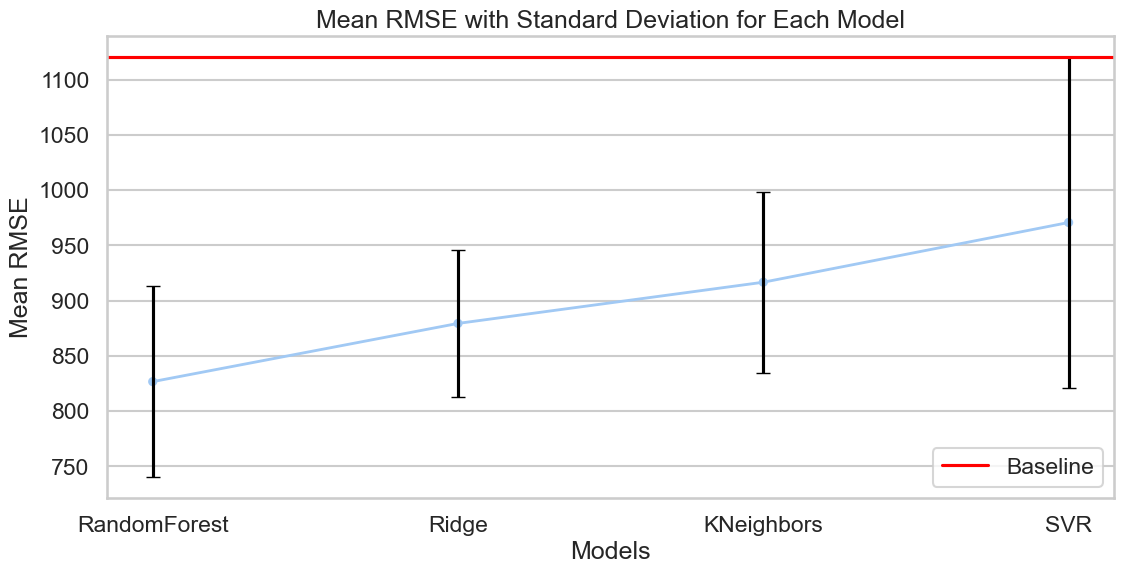

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Model names
models = ['RandomForest', 'Ridge', 'KNeighbors', 'SVR']

# Mean RMSE values for each model
mean_rmses = [rf_mean_rmse, ridge_mean_rmse, knn_mean_rmse, svr_mean_rmse]

# Standard deviation of RMSE for each model
std_rmses = [rf_std_rmse, ridge_std_rmse, knn_std_rmse, svr_std_rmse]

# Baseline RMSE
baseline_rmse = baseline_rmse

# Plotting
plt.figure(figsize=(13, 6))
sns.pointplot(x=models, y=mean_rmses, scale=0.5)
plt.errorbar(x=models, y=mean_rmses, yerr=std_rmses, fmt='none', capsize=5, color='black')
plt.axhline(y=baseline_rmse, color='r', linestyle='-', label='Baseline')
plt.yscale('linear')  # Change to linear scale
plt.xlabel('Models')
plt.ylabel('Mean RMSE')
plt.title('Mean RMSE with Standard Deviation for Each Model')
plt.legend()

# Save the plot
plt.savefig("mean_rmse_with_std.png", dpi = 300)
plt.show()

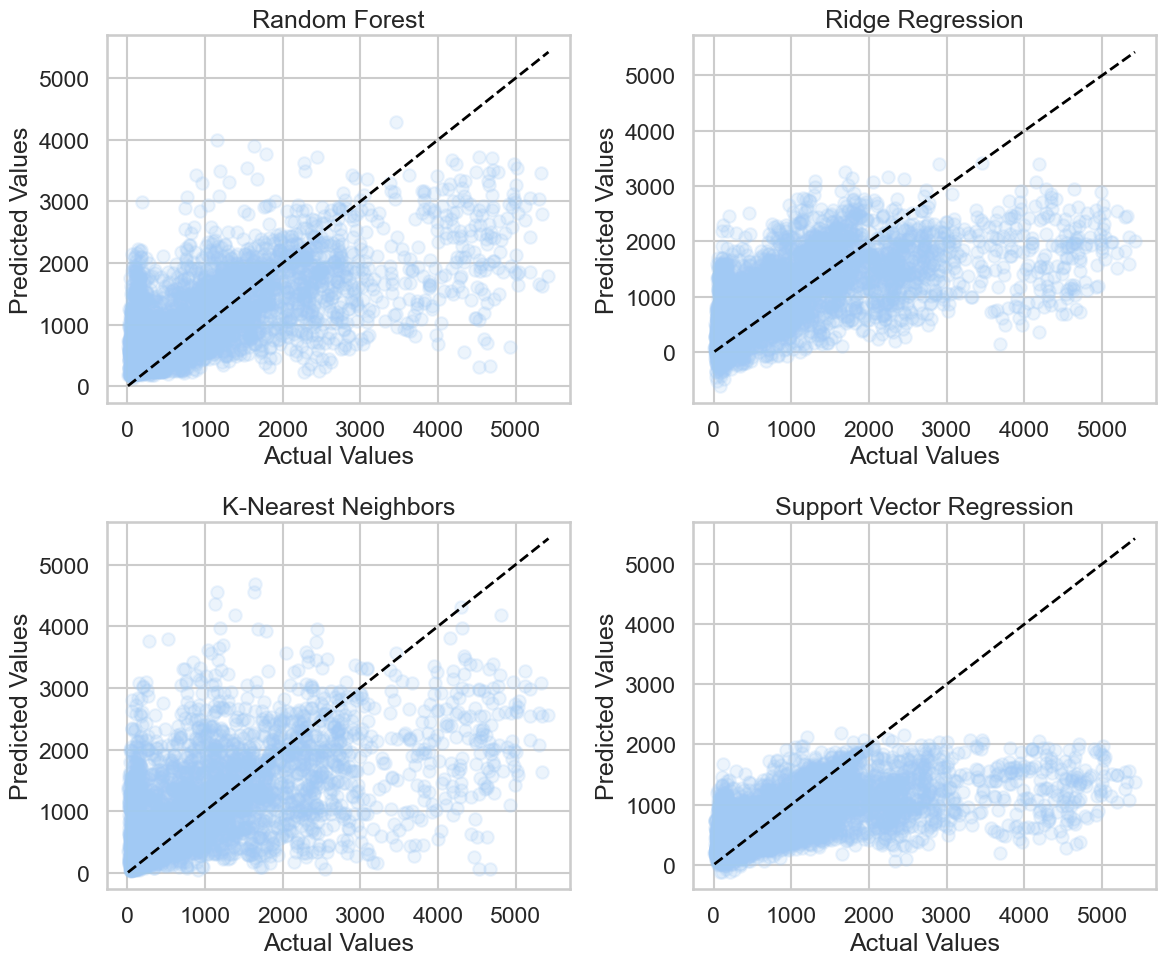

In [28]:
models = [
    ('Random Forest', rf_best_model),
    ('Ridge Regression', ridge_best_model),
    ('K-Nearest Neighbors', knn_best_model),
    ('Support Vector Regression', svr_best_model)
]

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten() 

for i, (model_name, model) in enumerate(models):
    y_pred = model.predict(X_test_prep)

    axs[i].scatter(y_test, y_pred, alpha=0.2)
    axs[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    axs[i].set_title(model_name)
    axs[i].set_xlabel('Actual Values')
    axs[i].set_ylabel('Predicted Values')

plt.tight_layout()
plt.savefig("true_vs_predict.png", dpi = 300)
plt.show()

Test score = 0.42468052087708263


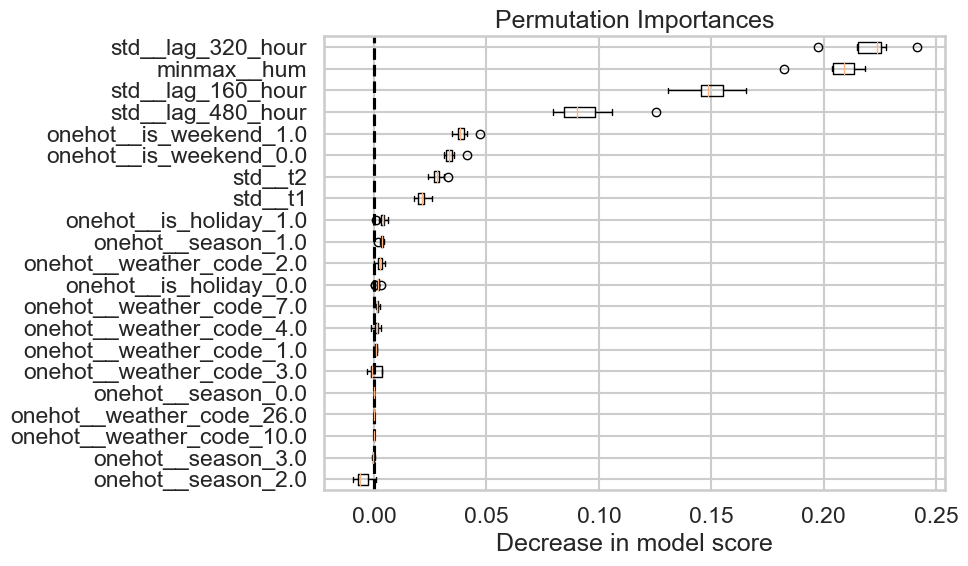

In [54]:
from sklearn.inspection import permutation_importance

# Calculate test score
test_score = rf_best_model.score(X_test_prep, y_test)
print('Test score =', test_score)

# Perform permutation importance
result = permutation_importance(rf_best_model, X_test_prep, y_test, n_repeats=10, random_state=88, n_jobs=-1)

# Extract feature names from the preprocessor in the pipeline
feature_names = np.array(preprocessor.get_feature_names_out())

# Sort the features by importance
sorted_idx = result.importances_mean.argsort()

# Plot
plt.figure(figsize=(10, 6))
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=feature_names[sorted_idx])
plt.axvline(0, color='k', linestyle='--')
plt.title("Permutation Importances")
plt.xlabel('Decrease in model score')
plt.tight_layout()
plt.savefig('permutation_importances.png', dpi=300)
plt.show()

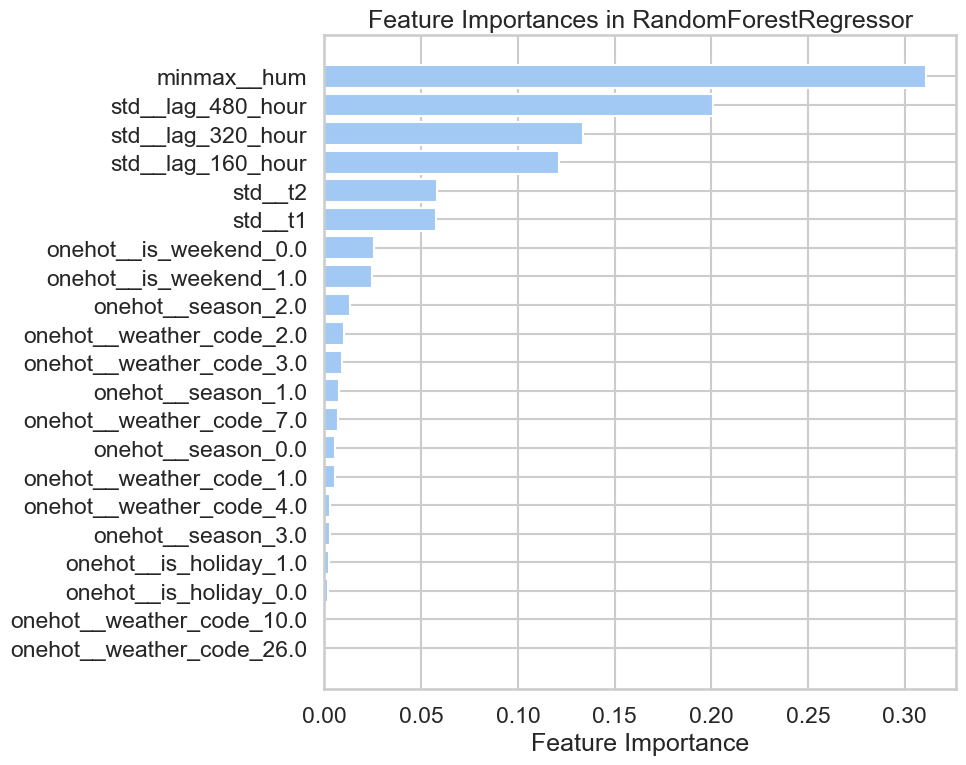

In [57]:
# Extract feature importances
feature_importances = rf_best_model.feature_importances_

# Extract feature names from the preprocessor in the pipeline
feature_names = np.array(preprocessor.get_feature_names_out())

# Sort the feature indices by importance
sorted_indices = np.argsort(feature_importances)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(feature_names[sorted_indices], feature_importances[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importances in RandomForestRegressor')
plt.tight_layout()
plt.savefig('random_forest_feature_importances.png', dpi=300)
plt.show()

<Figure size 640x480 with 0 Axes>

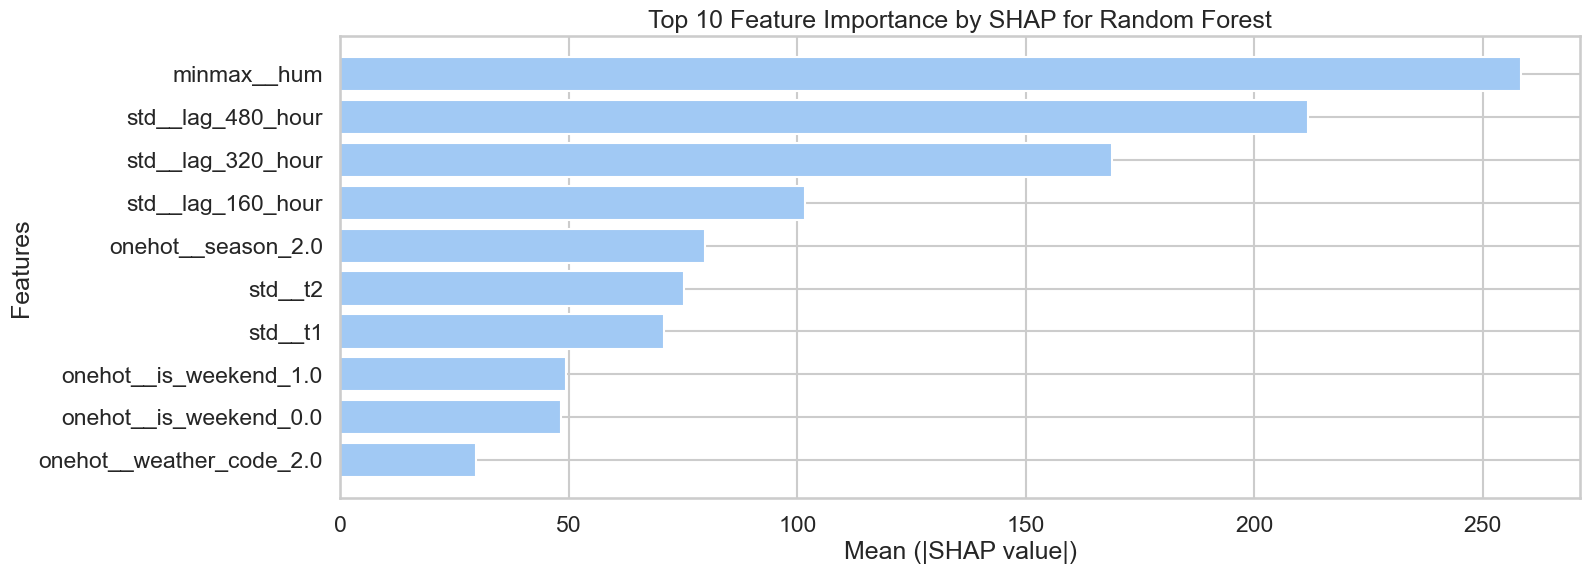

In [71]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Initialize the SHAP explainer with your Random Forest model
explainer = shap.Explainer(rf_best_model)

# Calculate SHAP values on a sample of the test set
X_sample = shap.utils.sample(X_test_prep, 100)  # Adjust the sample size as necessary
shap_values = explainer(X_sample)

# Calculate the mean absolute SHAP values for each feature
shap_importance = np.abs(shap_values.values).mean(axis=0)

# Extracting feature names if available
# You can replace 'preprocessor' with your specific preprocessing step if needed
feature_names = np.array(preprocessor.get_feature_names_out())

# Sorting the feature indices by importance
sorted_indices = np.argsort(shap_importance)

# Plotting the top 10 features
plt.figure(figsize=(16, 6))
plt.barh(feature_names[sorted_indices][-10:], shap_importance[sorted_indices][-10:])
plt.xlabel('Mean (|SHAP value|)')
plt.ylabel('Features')
plt.title('Top 10 Feature Importance by SHAP for Random Forest')
plt.savefig('shap_importances.png', dpi=300)
plt.show()

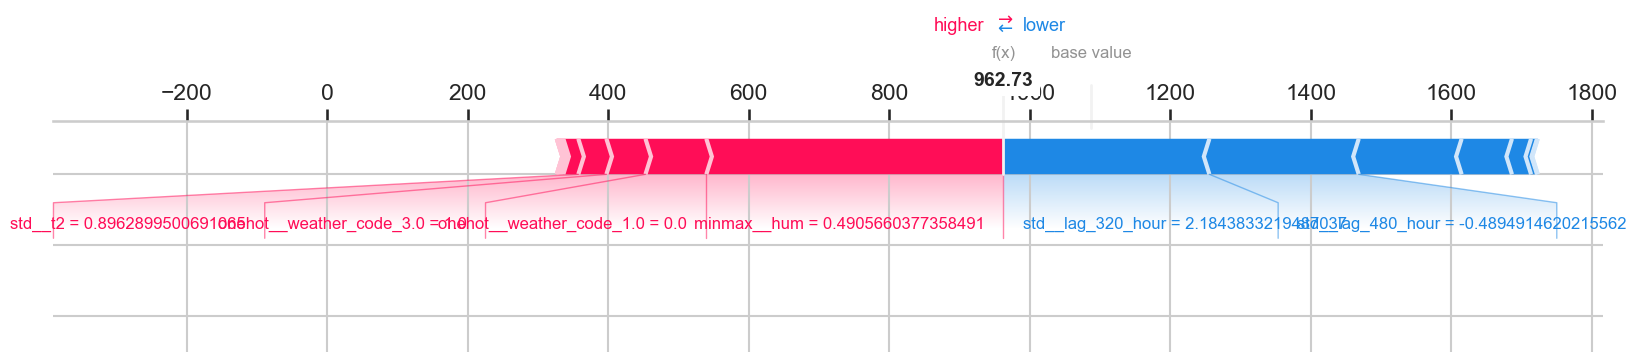

In [109]:
specific_data_points = pd.DataFrame(X_test_prep, columns=feature_names).iloc[[0, 100, 200]]

# Calculate SHAP values for the specific data point at index 0
shap_values_index_0 = explainer(specific_data_points.iloc[0])

# Generate SHAP force plot for the specific data point at index 0
shap.force_plot(
    explainer.expected_value,
    shap_values_index_0.values,  # SHAP values
    specific_data_points.iloc[0],  # Feature values
    matplotlib=True,
    show=False
)

# Save the SHAP force plot for index 0
plt.savefig('shap_force_plot_index_0.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

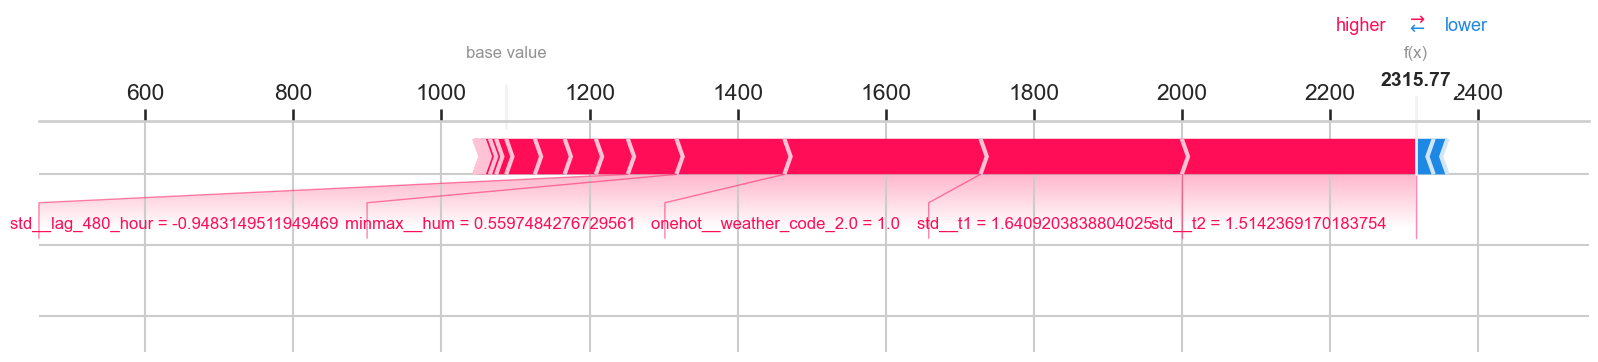

In [110]:
# Calculate SHAP values for the specific data point at index 100
shap_values_index_100 = explainer(specific_data_points.iloc[1])

# Generate SHAP force plot for the specific data point at index 100
shap.force_plot(
    explainer.expected_value,
    shap_values_index_100.values,  # SHAP values
    specific_data_points.iloc[1],  # Feature values
    matplotlib=True,
    show=False
)

# Save the SHAP force plot for index 100
plt.savefig('shap_force_plot_index_100.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

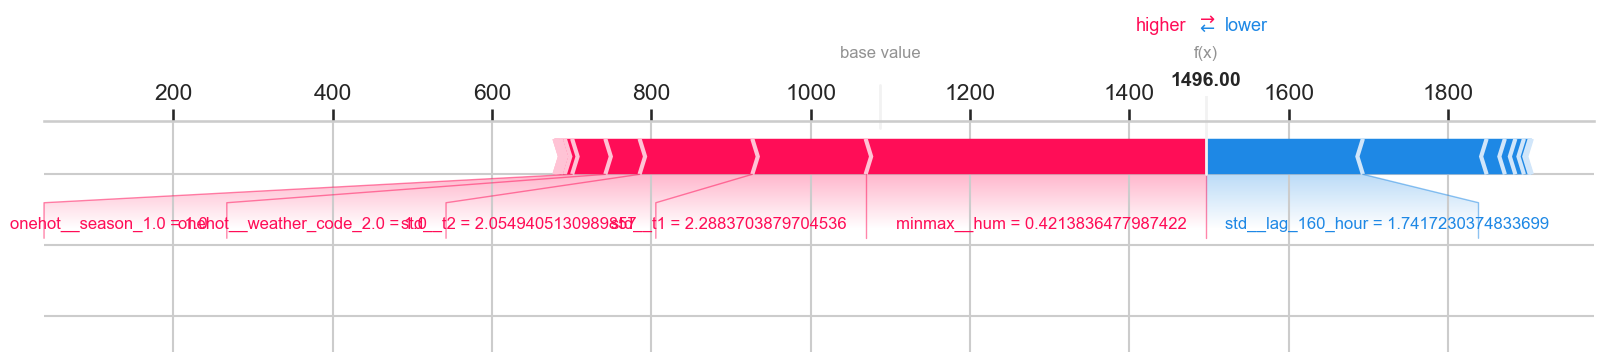

In [111]:
# Calculate SHAP values for the specific data point at index 200
shap_values_index_200 = explainer(specific_data_points.iloc[2])

# Generate SHAP force plot for the specific data point at index 200
shap.force_plot(
    explainer.expected_value,
    shap_values_index_200.values,  # SHAP values
    specific_data_points.iloc[2],  # Feature values
    matplotlib=True,
    show=False
)

# Save the SHAP force plot for index 200
plt.savefig('shap_force_plot_index_200.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()